<a href="https://colab.research.google.com/github/folga67/repo_retention_telecom/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
#normalizing data
from sklearn.preprocessing import StandardScaler
#pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
## https://www.kaggle.com/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv
## Context
## "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

## Content
## The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription,
## will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

## The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80)
## for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

In [ ]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Capstone_project/churn-bigml-80.csv')
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
data_test = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Capstone_project/churn-bigml-20.csv')
data_test.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


check missing values and data type


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


There are no missing and negative outliers in data. Data contains 2666 rows and 20 columns. The columns Churn  is Target. Let check balance of classes in data

In [ ]:
data.iloc[:,-1].value_counts(normalize = True), data_test.iloc[:,-1].value_counts(normalize = True)

(False    0.854464
 True     0.145536
 Name: Churn, dtype: float64, False    0.857571
 True     0.142429
 Name: Churn, dtype: float64)

Data contains unbalanced classes. This feature of data demands to apply cross_validation during validation of models.
Data and test datasets contains the similare shares of positive and negative classes. It makes us sure, that we are able to value model by suggested test dataset.
Have a look at distribution of features in data.



In [ ]:
features = data.columns.tolist()[:-1]
target = data.columns.tolist()[-1]

In [ ]:
## check features: frequency
def nom_plot(nom_col):
    nom_data=data[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.figure(figsize = (20,4))
    plt.title(nom_col)
    plt.bar(nom_data_counts.index,nom_data_counts)
    ##print('{}:\n{}'.format(nom_col,nom_data_counts))
    #print('{}:\n{}'.format(nom_col,nom_data_counts/len(data.index)))
    plt.show()

In [ ]:
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
numeric_data = data[numeric_columns]

Histogram for Numerical Variables


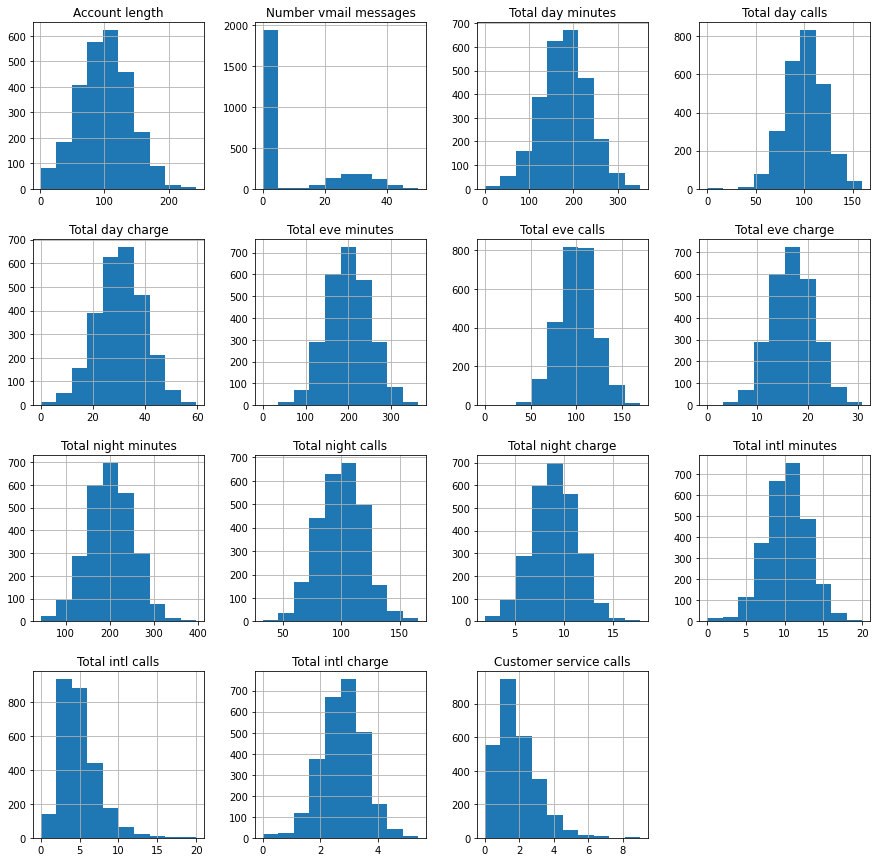

In [ ]:
#@title Default title text
print ("Histogram for Numerical Variables")
plots = numeric_data.hist(figsize=(15,15))

In [ ]:
##for i in features:
    ##nom_plot(i)

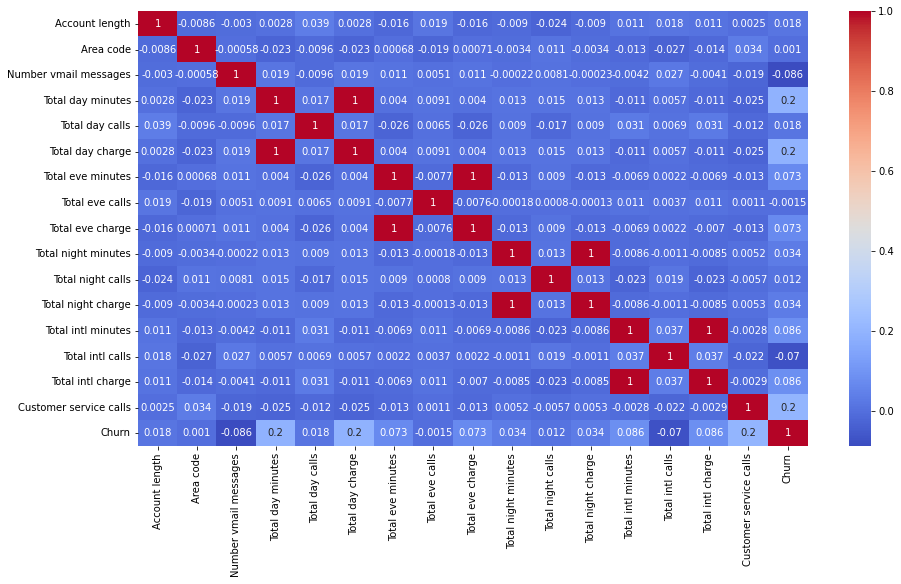

In [ ]:
corr = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

Observation:
With regard to the heatmap we can see high correlation bettween the following variables:
With respect to churn:-
- Total day minutes to Churn at 0.2
- Total day charge to Churn at 0.2
- Customer service calls to Churn at 0.2


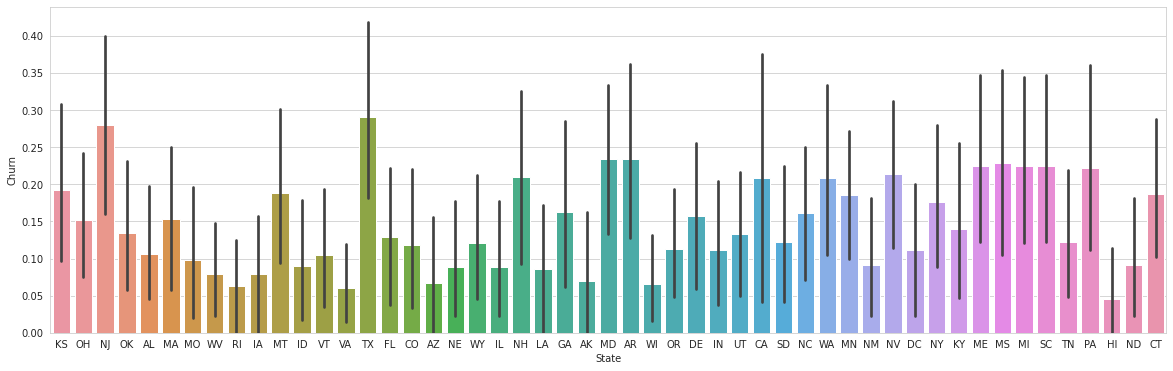

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=data)

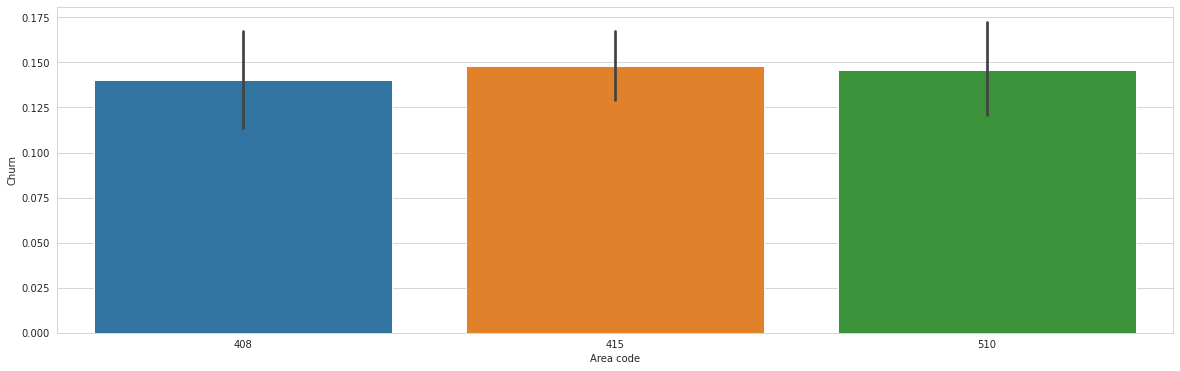

In [ ]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='Area code',y='Churn', data=data)

In [ ]:
data['Area code'].value_counts()

415    1318
510     679
408     669
Name: Area code, dtype: int64

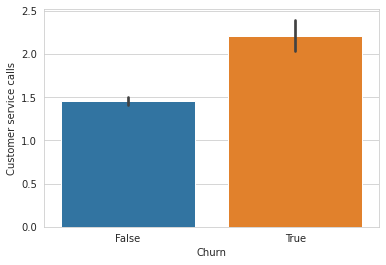

In [ ]:
sns.barplot(x='Churn', y='Customer service calls',data=data)

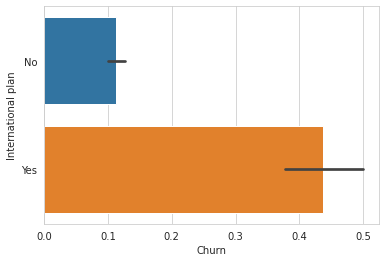

In [ ]:
sns.barplot(x='Churn', y='International plan',data=data)

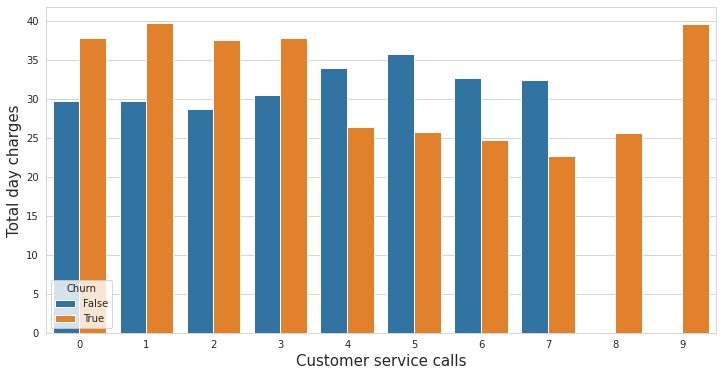

In [ ]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()

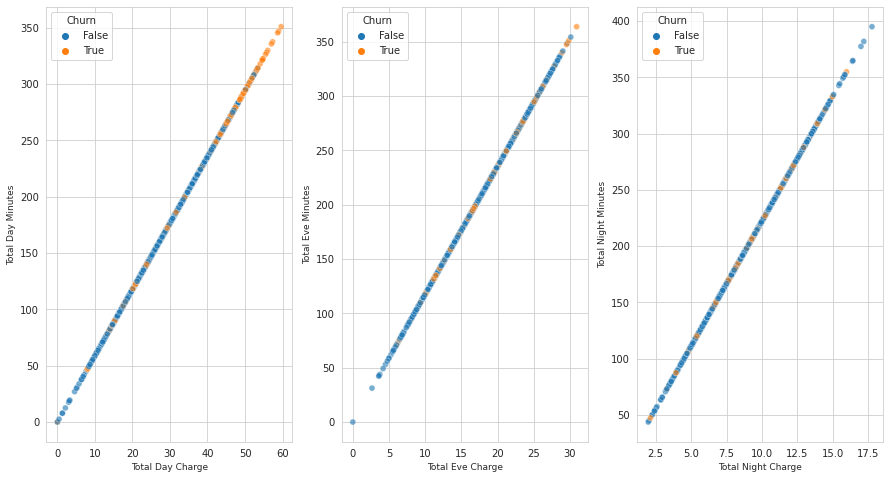

In [ ]:
# How does time of minutes spoken relate to the Churn rate
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = data, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = data, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = data, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

Inference:
- We can observe from the three scatterplots that the churn rate is maximum times True in the Day.
- In the evening and night we can see that the churn rate is not so relevant.

In [ ]:
# Creating a new dataframe dftotal:
dftotal = pd.DataFrame(data['Churn'])
#Creating three columns for total minutes, total calls and total charges
dftotal['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes']
dftotal['Total calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls']
dftotal['Total charges'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']
dftotal['Avg_time_calls'] = dftotal['Total minutes']/dftotal['Total calls']
dftotal['Avg_charges_calls'] = dftotal['Total charges']/dftotal['Total calls']


In [ ]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges,Avg_time_calls,Avg_charges_calls
0,False,707.2,300,72.86,2.357333,0.242867
1,False,611.5,329,55.54,1.858663,0.168815
2,False,527.2,328,59.00,1.607317,0.179878
3,False,558.2,248,65.02,2.250806,0.262177
4,False,501.9,356,49.36,1.409831,0.138652


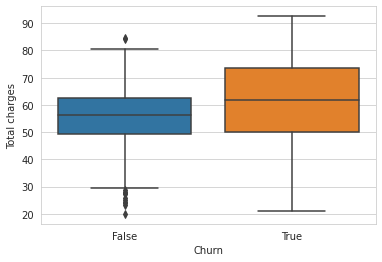

In [ ]:
sns.boxplot(x='Churn',y='Total charges', data = dftotal)

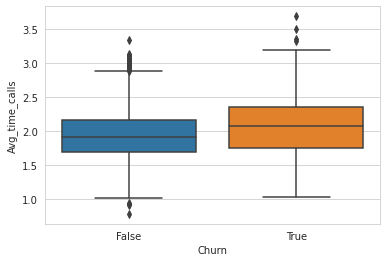

In [ ]:
sns.boxplot(x='Churn',y='Avg_time_calls', data = dftotal)

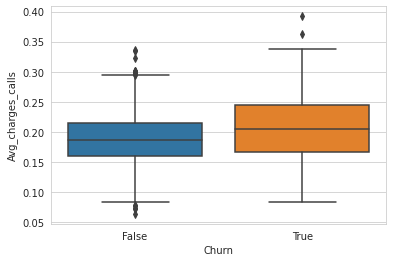

In [ ]:
sns.boxplot(x='Churn',y='Avg_charges_calls', data = dftotal)

Inference:
- Churned customers had higher charges to pay than remaining customers
- Churned customers had longer time per call than remaining customers
- Churned customers had higher charges per call than remaining customers

##Data preparing

In [ ]:
data_copy = data.copy()
data_copy.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
##X = data_copy[features].drop(['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], axis =1)
##y = data_copy[target]

Label encoding


In [ ]:
intl_plan = {"International plan":{"No": 0, "Yes": 1}}
vm_plan = {"Voice mail plan":{"No": 0, "Yes": 1}}
data_copy = data_copy.replace(intl_plan)
data_copy = data_copy.replace(vm_plan)

In [ ]:
test_copy = data_test.copy()
test_copy = test_copy.replace(intl_plan)
test_copy = test_copy.replace(vm_plan)

In [ ]:
X = data_copy[features]
y = data_copy[target]

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

Building pipeline:

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0                
        return X[self.columns]

In [ ]:
## to define the categories for pipeline
##cat_cols = X_train.select_dtypes(include=[object]).columns
cat_cols =['State', 'Area code']
label_cols = ['International plan', 'Voice mail plan']
continuos_cols = X_train.columns.drop(X_train[cat_cols])
continuos_cols = continuos_cols.drop(X_train[label_cols])

In [ ]:
continuos_cols, cat_cols

(Index(['Account length', 'Number vmail messages', 'Total day minutes',
        'Total day calls', 'Total day charge', 'Total eve minutes',
        'Total eve calls', 'Total eve charge', 'Total night minutes',
        'Total night calls', 'Total night charge', 'Total intl minutes',
        'Total intl calls', 'Total intl charge', 'Customer service calls'],
       dtype='object'), ['State', 'Area code'])

In [ ]:
## feature engineering
continuos_transformers = []
cat_transformers = []
label_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for label_col in label_cols:
    label_transformer = Pipeline([
                ('selector', NumberSelector(key=label_col))
            ])
    label_transformers.append((label_col, label_transformer))

In [ ]:
feats = FeatureUnion(continuos_transformers+cat_transformers+label_transformers)

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
results = []
names = []
for name, model in models:
  classifier = Pipeline([
    ('features',feats),
    ('classifier', model)])
  cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')
  names.append(name)
  results.append(cv_scores)
for i in range(len(names)):
  print(names[i],results[i].mean())

LR 0.8063918404827497
LDA 0.8058956720888538
KNN 0.765153496545542
CART 0.8142035205955661
RF 0.9146996889894616
SVM 0.9018294416021689
XGB 0.9174393420132055
GBR 0.9145907941885663


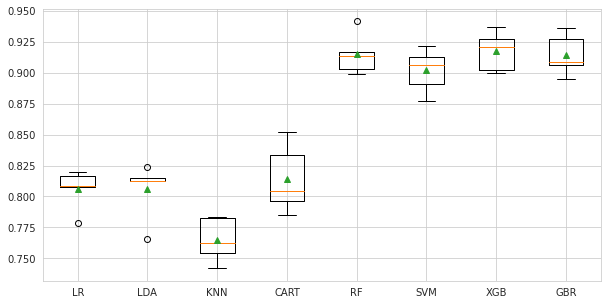

In [ ]:
plt.figure(figsize = (10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
classifier = Pipeline([
    ('features',feats),
    ('classifier', XGBClassifier(##max_depth=9,
                                 ##learning_rate=0.05,
                                 ##colsample_bytree = 0.8
                                 ))
])


cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')

In [ ]:
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

CV score is 0.9174393420132055


In [ ]:
## value valid data XGBClass
model = classifier.fit(X_train, y_train)
y_pred_XGB = model.predict(X_val)

In [ ]:
def evaluate_results(y_test, y_score):
    print('Classification results:')
    f1 = f1_score(y_test, y_score)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_score)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_score, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_score, average='binary')
    print("precision: %.2f%%" % (prc * 100.0))    

In [ ]:
XGBClass_ = evaluate_results(y_val, y_pred_XGB)

Classification results:
f1: 77.31%
roc: 82.18%
recall: 64.79%
precision: 95.83%


Inference:
Model XGBClassifier show the best roc_auc score, and prove, that this model offer the maximal related precision and recall

In [ ]:
cnf_matrix = confusion_matrix(y_val, y_pred_XGB)
cnf_matrix 

array([[461,   2],
       [ 25,  46]])

In [ ]:
y_val.value_counts()

False    463
True      71
Name: Churn, dtype: int64

Prediction on data test

In [ ]:
X = test_copy.drop('Churn', axis =1)
y = test_copy['Churn']

In [ ]:
y_pred_test = model.predict(X)

In [ ]:
XGBClass_test = evaluate_results(y, y_pred_test)

Classification results:
f1: 78.05%
roc: 83.25%
recall: 67.37%
precision: 92.75%


In [ ]:
cnf_matrix = confusion_matrix(y, y_pred_test)
cnf_matrix

array([[567,   5],
       [ 31,  64]])

In [ ]:
TN = cnf_matrix[0][0]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
FP = cnf_matrix[0][1]
print(TP, FP, FN,TN)

64 5 31 567


In [ ]:
y.value_counts(normalize=True)

False    0.857571
True     0.142429
Name: Churn, dtype: float64

## Preparing data without pipeline for tuning and evaluate importance of features

In [ ]:
data_copy.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
data_copy['Area code'] = data_copy['Area code'].astype(str)

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   object 
 3   International plan      2666 non-null   int64  
 4   Voice mail plan         2666 non-null   int64  
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
data=pd.concat([data_copy, pd.get_dummies(data_copy['State'])], axis=1)
data=pd.concat([data, pd.get_dummies(data['Area code'])], axis=1)
data= data.drop(data[cat_cols], axis = 1)

In [ ]:
data[continuos_cols] = StandardScaler().fit_transform(data[continuos_cols])

In [ ]:
data.head(3)

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
0,0.692163,0,1,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.161278,0,1,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.919686,0,0,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8, random_state=0)
X_train.shape, y_train.shape

((2132, 71), (2132,))

In [ ]:
model = XGBClassifier()
#обучим на тренировочном датасете
clf = model.fit(X_train, y_train)
##clf = model.fit(X_train, y_train.iloc[:,-1:].values.ravel())
y_score = clf.predict(X_val)

In [ ]:
XGBClass_ = evaluate_results(y_val, y_score)

Classification results:
f1: 80.99%
roc: 85.18%
recall: 71.01%
precision: 94.23%


In [ ]:
cnf_matrix = confusion_matrix(y_val, y_score)
cnf_matrix

array([[462,   3],
       [ 20,  49]])

Have a look at importance of features for XGBoostClass

In [ ]:
clf_features = pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
clf_features

,feature,importance
1,Total day minutes,111
5,Total eve minutes,73
8,Total intl minutes,67
0,Customer service calls,53
2,International plan,51
4,Total night minutes,43
3,Voice mail plan,32
7,Total intl calls,31
16,Total eve calls,17
10,Total night calls,15


In [ ]:
pip install shap

     |████████████████████████████████| 371 kB 8.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509233 sha256=a2de2cd34b23316149ad8217b2bd9be43143016429f88b98d4bbc5d47e95b380
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

model = xgb.train( {'max_depth':9,
                    'learning_rate': 0.05,
                    'colsample_bytree': 0.8
                    }, 
                      xgb.DMatrix(X_train, label=y_train), 100)

# строим модель объЯсненияе в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# покажем объяснение первого примера (берем matplotlib=True для обхода Javascript)
shap.initjs() # для работы в колаборатории 
shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[93,:])

In [ ]:
y_train[93]

True

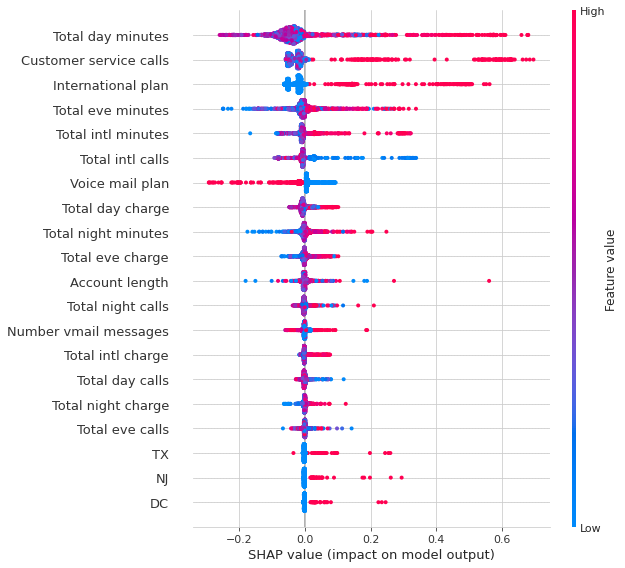

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

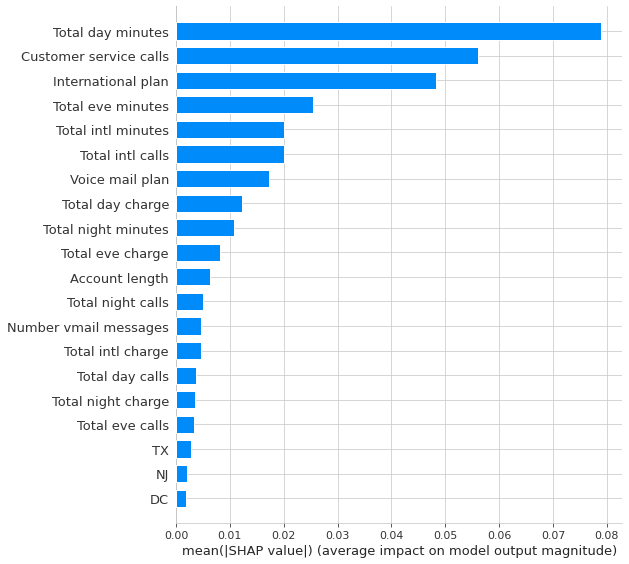

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Staking
we can try to combine these five models into a single ensemble model using stacking.

We can use a logistic regression model to learn how to best combine the predictions from each of the separate five models.

The get_stacking() function below defines the StackingClassifier model by first defining a list of tuples for the five base models, then defining the logistic regression meta-model to combine the predictions from the base models using 5-fold cross-validation.

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('RF', RandomForestClassifier()))
  # define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
from sklearn.datasets import make_classification 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=71, n_informative=15, n_redundant=5, random_state=1)
	return X, y

In [ ]:
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['rf'] = RandomForestClassifier()
	models['stacking'] = get_stacking()
	return models

In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

>lr 0.852 (0.032)
>knn 0.914 (0.024)
>cart 0.781 (0.032)
>svm 0.944 (0.016)
>rf 0.885 (0.031)
>stacking 0.947 (0.020)


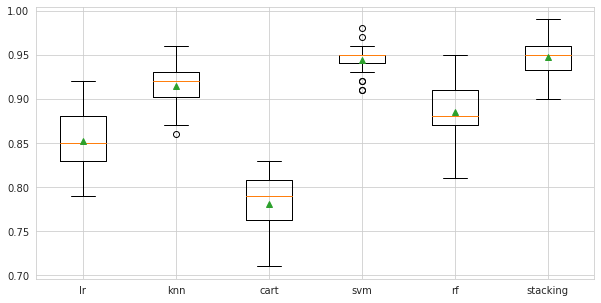

In [ ]:
plt.figure(figsize = (10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# >lr 0.852 (0.032)
# >knn 0.914 (0.024)
# >cart 0.781 (0.041)
# >svm 0.944 (0.016)
# >rf 0.883 (0.033)
# >stacking 0.947 (0.019)

In [ ]:
model

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()),
                               ('RF', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

##Predict on test data

In [ ]:
data_test['Area code'] = data_test['Area code'].astype(str)

In [ ]:
test_copy= pd.concat([data_test, pd.get_dummies(data_test['State'])], axis=1)
test_copy = pd.concat([test_copy, pd.get_dummies(test_copy['Area code'])], axis=1)
test_copy = test_copy.drop(['State', 'Area code'], axis=1)
test_copy = test_copy.replace(intl_plan)
test_copy = test_copy.replace(vm_plan)
test_copy[continuos_cols] = StandardScaler().fit_transform(test_copy[continuos_cols])
test_copy.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
0,0.347127,0,0,-0.601245,0.064036,-0.193167,0.064504,2.983872,-1.081478,2.984789,0.324092,-0.501749,0.323581,-0.548297,-0.212747,-0.547714,-0.423098,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.927731,0,0,-0.601245,-0.934756,1.769398,-0.934501,0.506113,-0.923033,0.505504,0.183311,0.540053,0.185049,0.877350,0.593516,0.877843,1.828550,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.425853,0,0,-0.601245,2.739500,-1.665090,2.739121,2.303545,-0.183625,2.302808,-0.786067,1.383417,-0.784675,-1.724455,1.802910,-1.722480,1.828550,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.200028,0,0,-0.601245,-1.271894,0.101218,-1.271744,-1.329563,0.080450,-1.329688,-0.202831,0.242395,-0.203735,-0.904709,0.593516,-0.904104,0.327451,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-1.319994,0,0,-0.601245,-1.111438,0.788115,-1.111607,0.236397,0.450154,0.235553,-0.422048,-0.501749,-0.422705,0.307091,-1.422141,0.310260,-0.423098,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test = test_copy.drop('Churn', axis =1)
y_test = test_copy['Churn']

In [ ]:
X_test.shape

(667, 71)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=71, n_informative=15, n_redundant=5, random_state=1)
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
##level0.append(('RF', RandomForestClassifier()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
clf = model.fit(X,y)

In [ ]:
X

array([[ 0.01013178, -0.33676578,  0.88066573, ...,  1.8097916 ,
         0.42219021, -0.08614907],
       [-0.01353403,  0.44473573,  0.13314987, ..., -1.65754181,
        -0.63656996,  0.39123385],
       [ 0.46640223,  0.38171084, -0.89633049, ...,  0.17810171,
         0.78584677,  0.54219178],
       ...,
       [ 0.29677095, -1.7497012 ,  0.10212051, ...,  1.01404746,
        -1.75083908,  0.09608705],
       [-1.2790559 ,  0.8591586 , -0.17911339, ...,  4.98956179,
         1.04801852, -0.45546699],
       [-0.1055388 ,  0.60738773, -0.60698426, ...,  3.16816801,
        -0.07949138,  0.22259117]])

In [ ]:
y_score = clf.predict(X_test.values)

In [ ]:
StackClass_ = evaluate_results(y_test, y_score)

Classification results:
f1: 7.46%
roc: 49.66%
recall: 5.26%
precision: 12.82%


In [ ]:
model = get_stacking()
clf = model.fit(X,y)
#обучим на тренировочном датасете
##clf = model.fit(X, y)
##clf = model.fit(X_train, y_train.iloc[:,-1:].values.ravel())
##y_score = clf.predict()

In [ ]:
y_score = clf.predict(X_test.values)

In [ ]:
StackClass_ = evaluate_results(y_test, y_score)

Classification results:
f1: 7.46%
roc: 49.66%
recall: 5.26%
precision: 12.82%


##Develop a Blending Ensemble

In [ ]:
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models

We can tie all of this together into a function named fit_ensemble() that trains the blending model using a training dataset and holdout validation dataset.


In [ ]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

we can collect the predictions from each base model into a training dataset, stack the predictions together, and call predict() on the blender model with this meta-level dataset.

The predict_ensemble() function below implements this. Given the list of fit base models, the fit blender ensemble, and a dataset (such as a test dataset or new data), it will return a set of predictions for the dataset.

In [ ]:
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)

Recall that the base models are fit on a training dataset. The meta-model is fit on the predictions made by each base model on a holdout dataset.

First, we can enumerate the list of models and fit each in turn on the training dataset. Also in this loop, we can use the fit model to make a prediction on the hold out (validation) dataset and store the predictions for later.

In [ ]:

# test classification dataset
##from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=2666, n_features=71, n_informative=15, n_redundant=5, random_state=0)
# summarize the dataset
print(X.shape, y.shape)

(2666, 71) (2666,)


we need to split the dataset up, first into train and test sets, and then the training set into a subset used to train the base models and a subset used to train the meta-model.

In this case, we will use a 50-50 split for the train and test sets, then use a 67-33 split for train and validation sets.

In [ ]:
# split dataset into train and test sets
##X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize data split
print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))

Train: (2132, 71), Val: (534, 71)


The fit_ensemble() function can then be called to fit the blending ensemble on the train and validation datasets and the predict_ensemble() function can be used to make predictions on the holdout dataset.

In [ ]:
from numpy import hstack
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_val)

In [ ]:
# make predictions on test set
yhat = predict_ensemble(models, blender, X_val)

Finally, we can evaluate the performance of the blending model by reporting the classification accuracy on the test dataset.


In [ ]:
BlendClass_ = evaluate_results(y_val, yhat)

Classification results:
f1: 94.05%
roc: 94.21%
recall: 94.59%
precision: 93.51%


##Predict on test data

In [ ]:
X_test.shape

(667, 71)

In [ ]:
yhat = predict_ensemble(models, blender, X_test.values)

In [ ]:
BlendClass_ = evaluate_results(y_test, yhat)

Classification results:
f1: 24.00%
roc: 47.98%
recall: 94.74%
precision: 13.74%
